In [12]:
import pandas as pd
diabetes = pd.read_csv('daibetes.csv')
diabetes.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,class
0,1,85,66,29,0,26.6,0.351,31,0
1,8,183,64,0,0,23.3,0.672,32,1
2,1,89,66,23,94,28.1,0.167,21,0
3,0,137,40,35,168,43.1,2.288,33,1
4,5,116,74,0,0,25.6,0.201,30,0


In [16]:
#cleanig data
diabetes.columns
cols_to_norm = ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction',
                'Age', 'class']
diabetes[cols_to_norm] = diabetes[cols_to_norm].apply(lambda x: (x - x.min())/ (x.max() - x.min()))
diabetes.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,class
0,0.058824,0.427136,0.540984,0.292929,0.000000,0.396423,0.116567,0.166667,0.0
1,0.470588,0.919598,0.524590,0.000000,0.000000,0.347243,0.253629,0.183333,1.0
2,0.058824,0.447236,0.540984,0.232323,0.111111,0.418778,0.038002,0.000000,0.0
3,0.000000,0.688442,0.327869,0.353535,0.198582,0.642325,0.943638,0.200000,1.0
4,0.294118,0.582915,0.606557,0.000000,0.000000,0.381520,0.052519,0.150000,0.0


In [17]:
#tensorflow
import tensorflow as tf
num_preg = tf.feature_column.numeric_column('Pregnancies')
plasma_gluc = tf.feature_column.numeric_column('Glucose')
dias_press = tf.feature_column.numeric_column('BloodPressure')
s_thic = tf.feature_column.numeric_column('SkinThickness')
insuin = tf.feature_column.numeric_column('Insulin')
bmi = tf.feature_column.numeric_column('BMI')
pedigree = tf.feature_column.numeric_column('DiabetesPedigreeFunction')
age = tf.feature_column.numeric_column('Age')
cla = tf.feature_column.numeric_column('class')


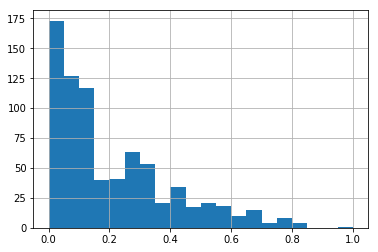

In [19]:
#categorical  features
assigned_group = tf.feature_column.categorical_column_with_vocabulary_list('Group',['A', 'B', 'C', 'D'])
# converting continuous to categorical
import matplotlib.pyplot as plt
%matplotlib inline
diabetes['Age'].hist(bins=20)

In [20]:
age_buckets =tf.feature_column.bucketized_column(age, boundaries = [20, 30, 40, 50, 60, 70,80])
#combining all the features
feat_cols = [num_preg, plasma_gluc,dias_press,s_thic,insuin,bmi,pedigree,age_buckets]

 

In [21]:
#splitting the data
x_data = diabetes.drop('class',axis=1)
labels = diabetes['class']
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x_data, labels,test_size = 0.33,random_state = 101)

In [23]:
#applying i/p function
input_func = tf.estimator.inputs.pandas_input_fn(x=x_train,y=y_train,batch_size=10, num_epochs=1000,shuffle=True)


#model 
model = tf.estimator.LinearClassifier(feature_columns=feat_cols,n_classes=2)


W0820 14:35:31.114126  4052 estimator.py:1811] Using temporary folder as model directory: C:\Users\User\AppData\Local\Temp\tmpiqa8uzjl


In [24]:
model.train(input_fn=input_func,steps =1000)

W0820 14:37:25.868577  4052 deprecation.py:323] From C:\Anakonda3\lib\site-packages\tensorflow\python\training\training_util.py:236: Variable.initialized_value (from tensorflow.python.ops.variables) is deprecated and will be removed in a future version.
Instructions for updating:
Use Variable.read_value. Variables in 2.X are initialized automatically both in eager and graph (inside tf.defun) contexts.
W0820 14:37:25.922177  4052 deprecation.py:323] From C:\Anakonda3\lib\site-packages\tensorflow_estimator\python\estimator\inputs\queues\feeding_queue_runner.py:62: QueueRunner.__init__ (from tensorflow.python.training.queue_runner_impl) is deprecated and will be removed in a future version.
Instructions for updating:
To construct input pipelines, use the `tf.data` module.
W0820 14:37:25.922177  4052 deprecation.py:323] From C:\Anakonda3\lib\site-packages\tensorflow_estimator\python\estimator\inputs\queues\feeding_functions.py:500: add_queue_runner (from tensorflow.python.training.queue_ru

In [26]:
#prediction
pred_input_func = tf.estimator.inputs.pandas_input_fn(x=x_test,batch_size=10, num_epochs=1,shuffle=False)
predictions = model.predict(pred_input_func)
list(predictions)

W0820 14:41:45.797220  4052 deprecation.py:323] From C:\Anakonda3\lib\site-packages\tensorflow\python\training\saver.py:1276: checkpoint_exists (from tensorflow.python.training.checkpoint_management) is deprecated and will be removed in a future version.
Instructions for updating:
Use standard file APIs to check for files with this prefix.


[{'logits': array([-0.9363134], dtype=float32),
  'logistic': array([0.28164566], dtype=float32),
  'probabilities': array([0.7183544 , 0.28164563], dtype=float32),
  'class_ids': array([0], dtype=int64),
  'classes': array([b'0'], dtype=object),
  'all_class_ids': array([0, 1]),
  'all_classes': array([b'0', b'1'], dtype=object)},
 {'logits': array([0.28487325], dtype=float32),
  'logistic': array([0.5707406], dtype=float32),
  'probabilities': array([0.42925945, 0.5707406 ], dtype=float32),
  'class_ids': array([1], dtype=int64),
  'classes': array([b'1'], dtype=object),
  'all_class_ids': array([0, 1]),
  'all_classes': array([b'0', b'1'], dtype=object)},
 {'logits': array([0.78188765], dtype=float32),
  'logistic': array([0.6860868], dtype=float32),
  'probabilities': array([0.31391323, 0.68608683], dtype=float32),
  'class_ids': array([1], dtype=int64),
  'classes': array([b'1'], dtype=object),
  'all_class_ids': array([0, 1]),
  'all_classes': array([b'0', b'1'], dtype=object)},


In [27]:
#evalvation
eval_input_func = tf.estimator.inputs.pandas_input_fn(x=x_test,y=y_test,batch_size=10, num_epochs=1,shuffle=False)
results  = model.evaluate(eval_input_func)
results

W0820 14:44:36.424373  4052 deprecation.py:323] From C:\Anakonda3\lib\site-packages\tensorflow\python\ops\metrics_impl.py:2027: div (from tensorflow.python.ops.math_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Deprecated in favor of operator or tf.math.divide.
W0820 14:44:36.803144  4052 metrics_impl.py:804] Trapezoidal rule is known to produce incorrect PR-AUCs; please switch to "careful_interpolation" instead.
W0820 14:44:36.834104  4052 metrics_impl.py:804] Trapezoidal rule is known to produce incorrect PR-AUCs; please switch to "careful_interpolation" instead.


{'accuracy': 0.7480315,
 'accuracy_baseline': 0.6535433,
 'auc': 0.774644,
 'auc_precision_recall': 0.64820385,
 'average_loss': 0.5564286,
 'label/mean': 0.3464567,
 'loss': 5.4358797,
 'precision': 0.7307692,
 'prediction/mean': 0.38737327,
 'recall': 0.4318182,
 'global_step': 1000}